In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data collection and preparation

In [83]:
data = pd.read_csv(r'/home/tanvi/Downloads/cars.csv')

In [84]:
data.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [85]:
data.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [87]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Missing value Treatment

In [92]:
data['normalized-losses'].replace('?',np.nan,inplace=True)
data['horsepower'].replace('?',np.nan,inplace=True)

In [94]:
data.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [95]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='mean')
data[['normalized-losses','horsepower']]=si.fit_transform(data[['normalized-losses','horsepower']])

In [96]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

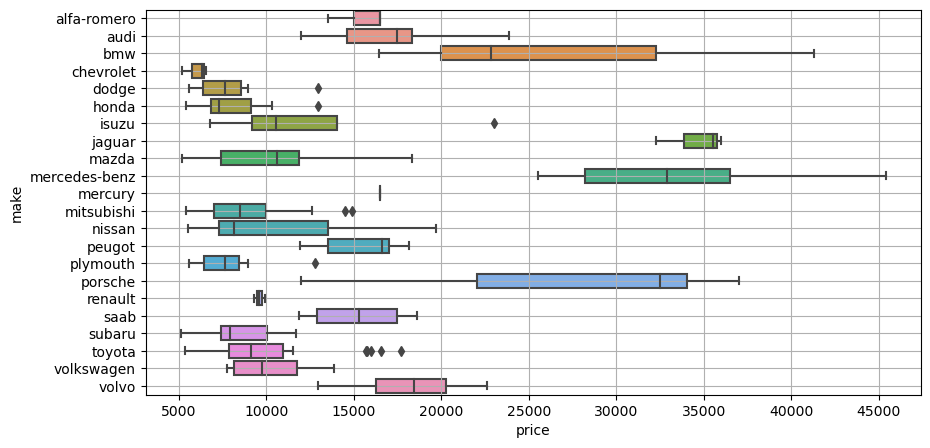

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x="price",y="make")
plt.grid()
plt.show()

In [89]:
i=data[(data['make']=='dodge')&(data['price']>10000)].index
data.drop(i,axis=0,inplace=True)


i=data[(data['make']=='honda')&(data['price']>12000)].index
data.drop(i,axis=0,inplace=True)

i=data[(data['make']=='isuzu')&(data['price']>20000)].index
data.drop(i,axis=0,inplace=True)


i=data[(data['make']=='mitsubishi')&(data['price']>13000)].index
data.drop(i,axis=0,inplace=True)


i=data[(data['make']=='plymouth')&(data['price']>10000)].index
data.drop(i,axis=0,inplace=True)


i=data[(data['make']=='toyota')&(data['price']>15000)].index
data.drop(i,axis=0,inplace=True)

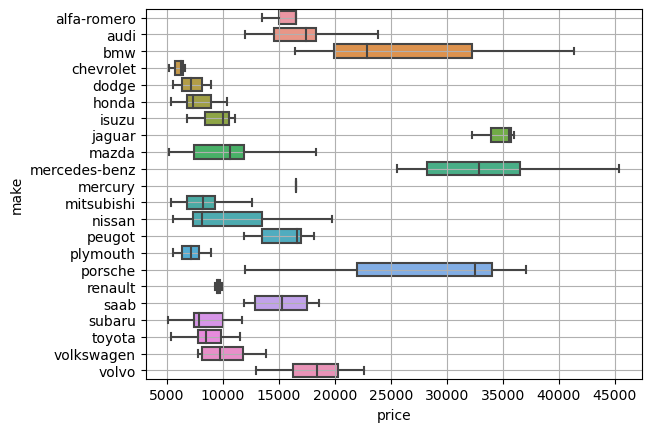

In [90]:
sns.boxplot(data=data,x="price",y="make")
plt.grid()
plt.show()

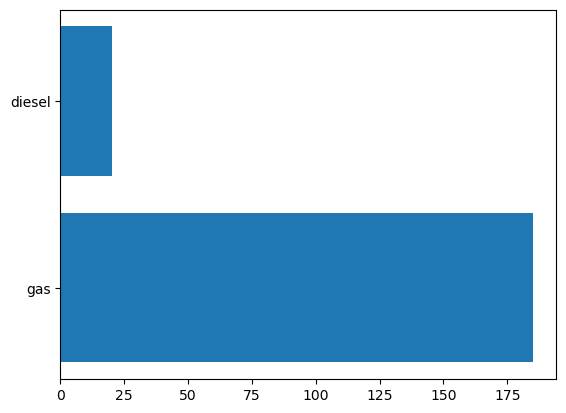

In [36]:
plt.barh(x,y)
plt.show()

#### Histogram

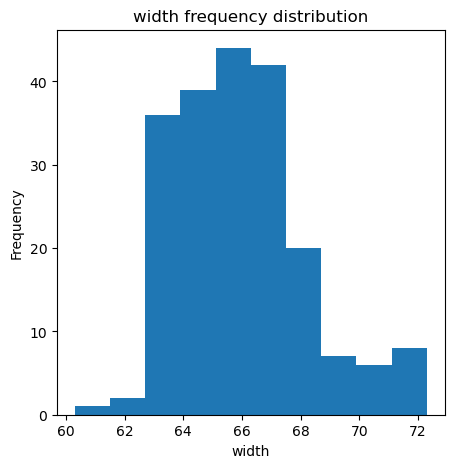

In [15]:
plt.figure(figsize=(5,5))
plt.hist(data['width'])
plt.xlabel('width')
plt.ylabel('Frequency')
plt.title('width frequency distribution')
plt.show()

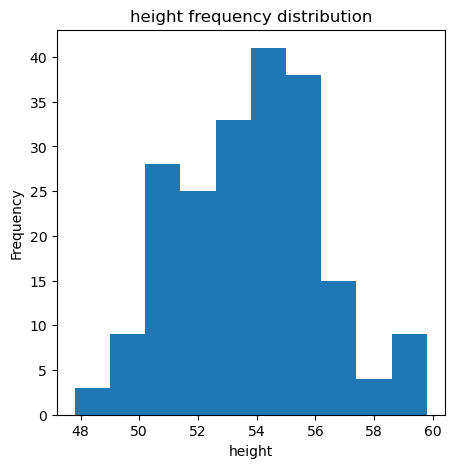

In [18]:
plt.figure(figsize=(5,5))
plt.hist(data['height'])
plt.xlabel('height')
plt.ylabel('Frequency')
plt.title('height frequency distribution')
plt.show()

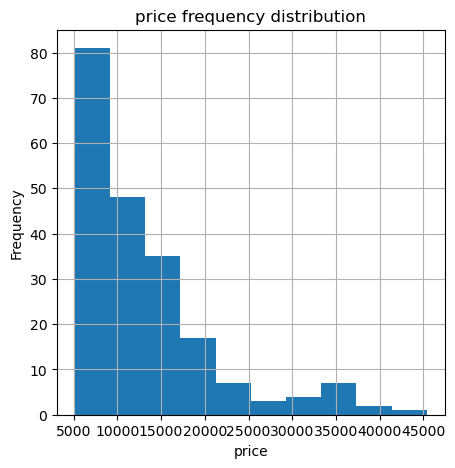

In [20]:
plt.figure(figsize=(5,5))
plt.hist(data['price'])
plt.grid()
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price frequency distribution')
plt.show()

#### draw mean and median line

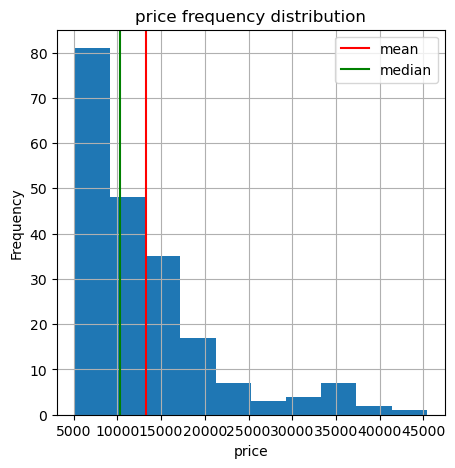

In [22]:
price_mean = data['price'].mean()
price_median = data['price'].median()

plt.figure(figsize=(5,5))
plt.hist(data['price'])
plt.axvline(price_mean,color='red',label='mean')
plt.axvline(price_median,color='green',label='median')
plt.legend()
plt.grid()
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price frequency distribution')
plt.show()

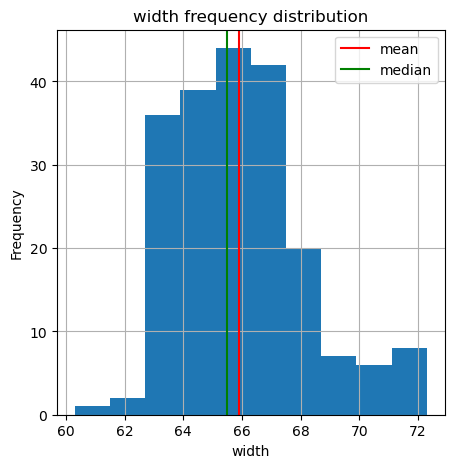

In [25]:
width_mean=data['width'].mean()
width_median=data['width'].median()


plt.figure(figsize=(5,5))
plt.hist(data['width'])
plt.axvline(width_mean,color='red',label='mean')
plt.axvline(width_median,color='green',label='median')
plt.legend()
plt.grid()
plt.xlabel('width')
plt.ylabel('Frequency')
plt.title('width frequency distribution')
plt.show()

In [27]:
list(data['fuel-type'].unique())

['gas', 'diesel']

In [29]:
x=list(data['fuel-type'].unique())

In [30]:
x

['gas', 'diesel']

In [32]:
data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [34]:
y=list(data['fuel-type'].value_counts())

In [35]:
y

[185, 20]

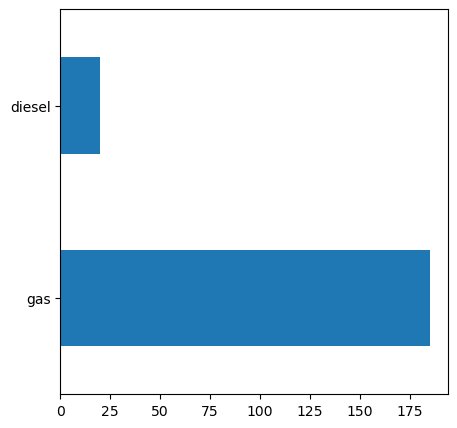

In [38]:
plt.figure(figsize=(5,5))
data['fuel-type'].value_counts().plot(kind='barh')
plt.show()

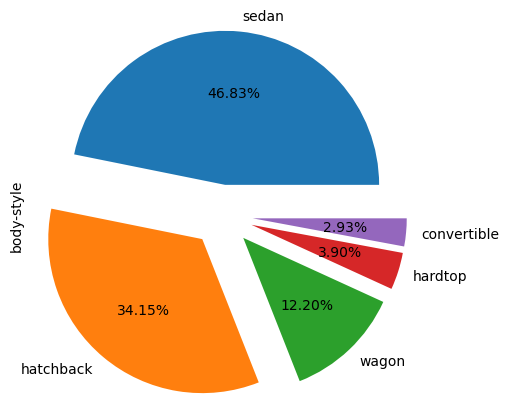

In [40]:
plt.figure(figsize=(5,5))
data['body-style'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=(0.2,0.2,0.2,0.2,0.2))
plt.show()

#### Scatter plot

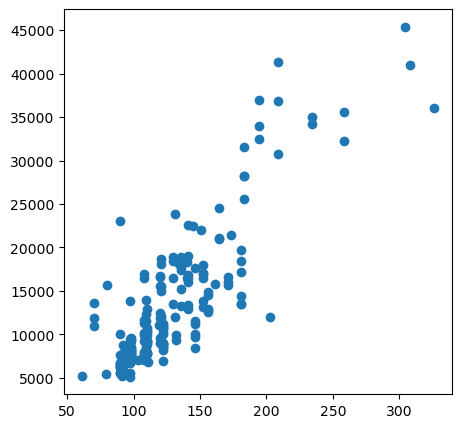

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(x=data['engine-size'],y=data['price'])


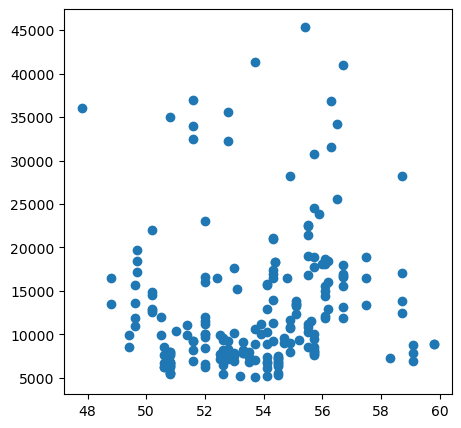

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(x=data['height'],y=data['price'])

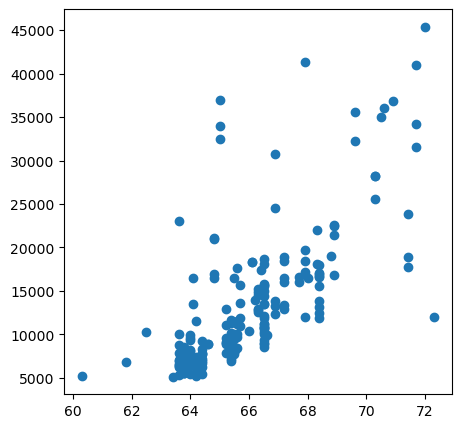

In [48]:
plt.figure(figsize=(5,5))
plt.scatter(x=data['width'],y=data['price'])

In [60]:
data.corr()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
symboling,1.000000,-0.232919,-0.541038,-0.105790,-0.035823,0.034606,-0.085781
width,-0.232919,1.000000,0.279210,0.735433,-0.642704,-0.677218,0.718253
height,-0.541038,0.279210,1.000000,0.067149,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.735433,0.067149,1.000000,-0.653658,-0.677470,0.852995
city-mpg,-0.035823,-0.642704,-0.048640,-0.653658,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.677218,-0.107358,-0.677470,0.971337,1.000000,-0.679048
price,-0.085781,0.718253,0.132444,0.852995,-0.654611,-0.679048,1.000000


<Axes: >

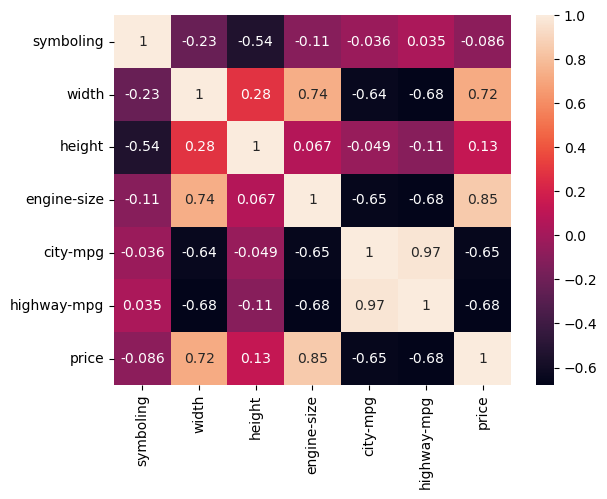

In [61]:
sns.heatmap(data=data.corr(),annot=True)

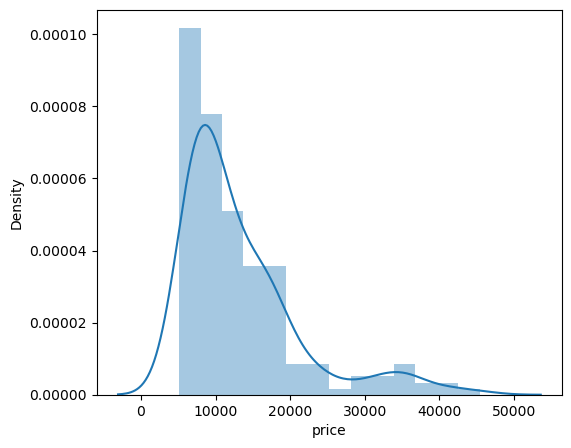

In [54]:
plt.figure(figsize=(6,5))
sns.distplot(data["price"])
plt.show()

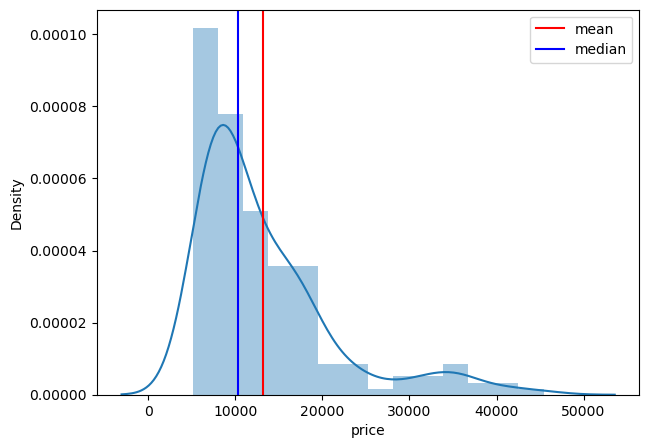

In [57]:
plt.figure(figsize=(7,5))
sns.distplot(data['price'])
plt.axvline(data['price'].mean(),color='red',label='mean')
plt.axvline(data['price'].median(),color='blue',label='median')
plt.legend()
plt.show()

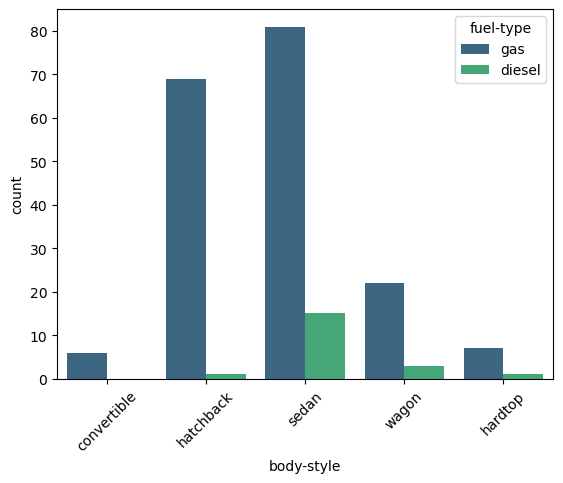

In [59]:
sns.countplot(data=data,x=data['body-style'],palette='viridis',hue='fuel-type')
plt.xticks(rotation=45)
plt.show()

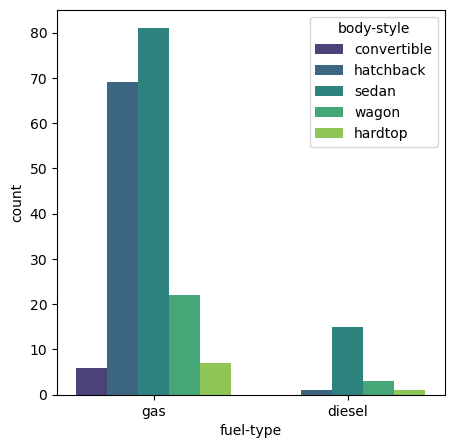

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x=data["fuel-type"],hue="body-style",palette="viridis")
plt.show()

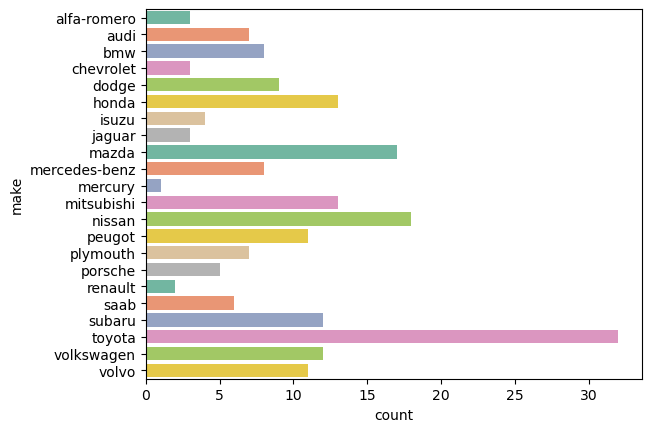

In [64]:
sns.countplot(data=data,y=data["make"],palette="Set2")
plt.show()

#### skewness removal

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [100]:
colname=data.select_dtypes(['int64','float64']).columns

In [101]:
from scipy.stats import skew

In [102]:
skew(data['symboling'])

0.21386866184357742

In [105]:
for i in data[colname]:
    print(i)
    print(skew(data[i]))

symboling
0.21386866184357742
normalized-losses
0.8613584381800099
width
0.9140400320504322
height
0.013839962443639326
engine-size
2.0541257626466156
horsepower
1.5571645456158771
city-mpg
0.5999073033714895
highway-mpg
0.4760310091695327
price
1.8166794702973463


symboling
0.21386866184357742


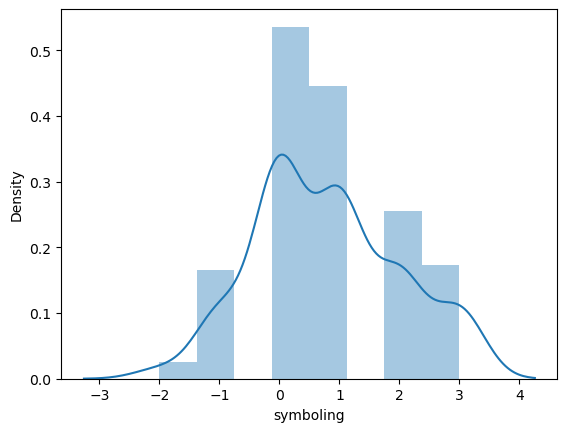

normalized-losses
0.8613584381800099


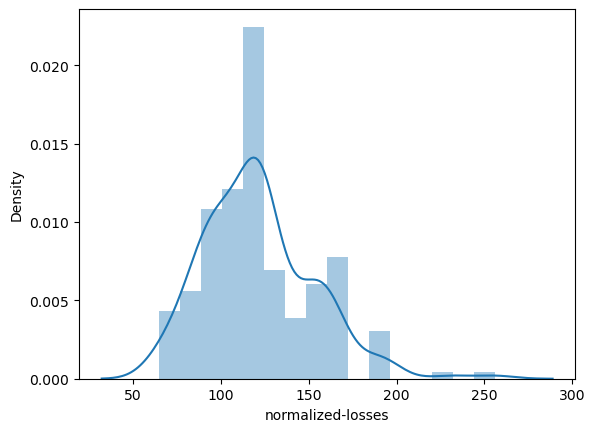

width
0.9140400320504322


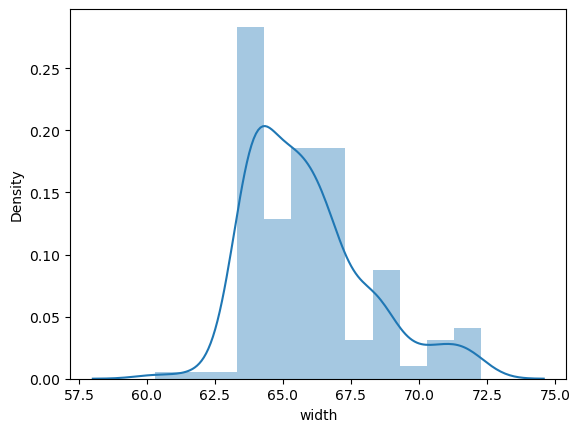

height
0.013839962443639326


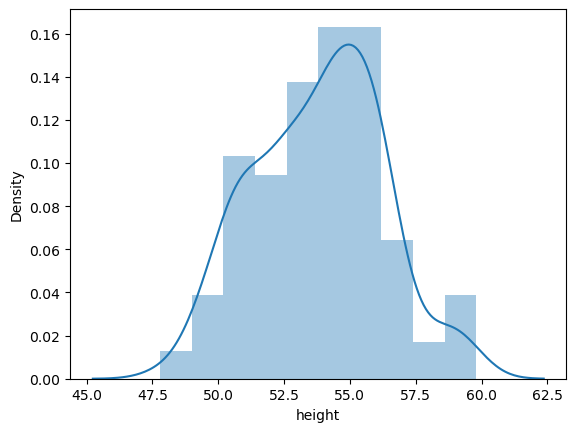

engine-size
2.0541257626466156


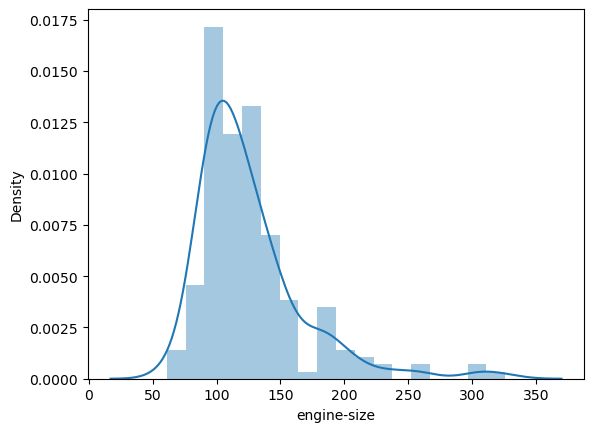

horsepower
1.5571645456158771


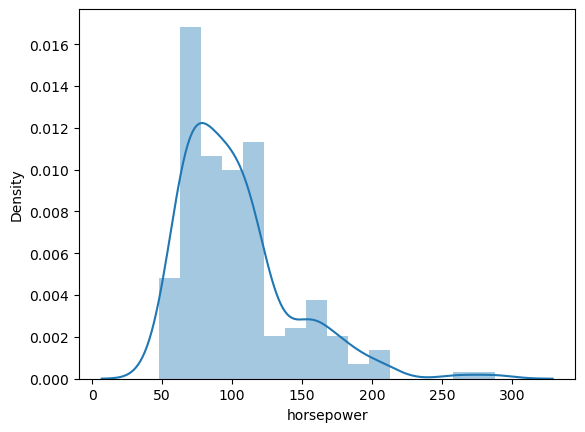

city-mpg
0.5999073033714895


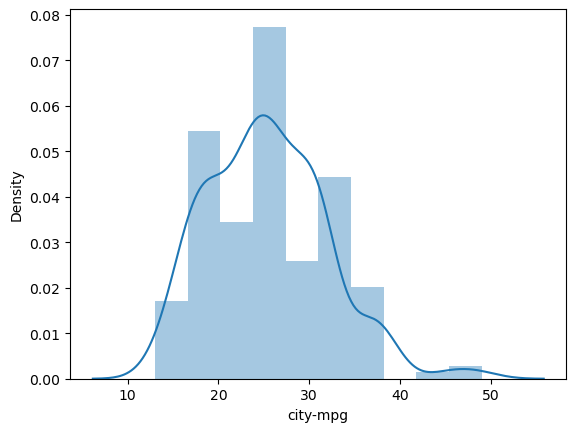

highway-mpg
0.4760310091695327


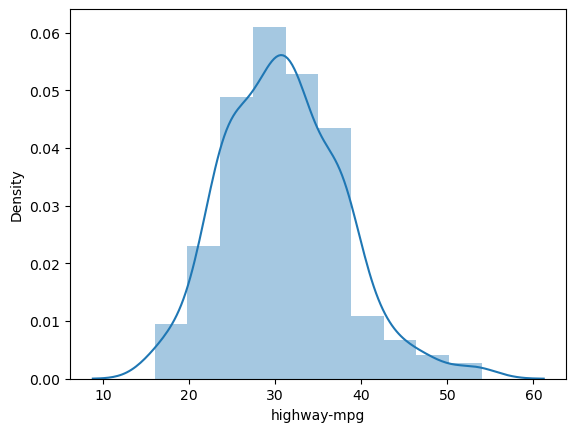

price
1.8166794702973463


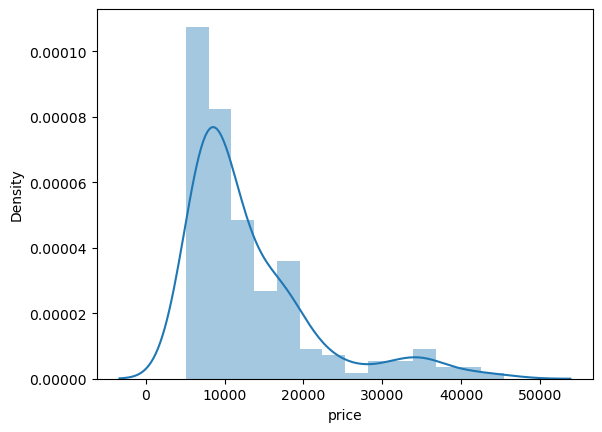

In [107]:
#for distribution
for i in data[colname]:
    print(i)
    print(skew(data[i]))
    plt.figure()
    sns.distplot(data[i])
    plt.show()

In [109]:
data.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447476,-0.272388,-0.521495,-0.153671,0.026988,0.007189,0.084238,-0.095905
normalized-losses,0.447476,1.000000,0.063760,-0.368570,0.086143,0.179555,-0.209198,-0.165858,0.125792
width,-0.272388,0.063760,1.000000,0.296011,0.735112,0.643767,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368570,0.296011,1.000000,0.096041,-0.078053,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.086143,0.735112,0.096041,1.000000,0.803892,-0.642711,-0.667078,0.869638
horsepower,0.026988,0.179555,0.643767,-0.078053,0.803892,1.000000,-0.796995,-0.761019,0.769140
city-mpg,0.007189,-0.209198,-0.641401,-0.078815,-0.642711,-0.796995,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.165858,-0.677911,-0.142926,-0.667078,-0.761019,0.970113,1.000000,-0.704846
price,-0.095905,0.125792,0.730503,0.147010,0.869638,0.769140,-0.680412,-0.704846,1.000000


In [111]:
data['normalized-losses']=np.log(data['normalized-losses'])

In [112]:
skew(data['normalized-losses'])

0.03155033360542812

In [113]:
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.797985,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.797985,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.797985,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


#### Encoding

In [120]:
catcol = data.select_dtypes(object).columns

In [121]:
catcol

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [122]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [123]:
data[catcol]=oe.fit_transform(data[catcol])

In [124]:
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.797985,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,3,4.797985,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,1,4.797985,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    float64
 3   fuel-type          194 non-null    float64
 4   body-style         194 non-null    float64
 5   drive-wheels       194 non-null    float64
 6   engine-location    194 non-null    float64
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    float64
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 24.2 KB


#### Linear Regression

In [127]:
x = data.drop('price',axis=1)
y= data['price']

In [131]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score , accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [133]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()


In [134]:
linreg.fit(X_train,y_train)

LinearRegression()

In [135]:
ypred=linreg.predict(X_test)

In [136]:
mae=mean_absolute_error(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,ypred)

In [137]:
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mae: 2816.1115744416147
mse: 16597470.43779561
rmse: 4073.9993173533558
r2: 0.7981023618436948


In [138]:
n=X_test.shape[0]
n

59

In [139]:
num=(n-1)*(1-r2)

In [140]:
p=X_test.shape[1]

In [141]:
den=n-p-1

In [142]:
re_adj=1-(num/den)

In [143]:
re_adj

0.7338622042485068